In [3]:
from pathlib import Path

while Path.cwd().name != 'retrieval-model-safety':
    %cd ..

%matplotlib inline

/home/luiza_cohere_com/retrieval-model-safety


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(context="paper", style="white", font_scale=1.5, palette="RdBu")

In [10]:
base = pd.DataFrame([
    {"model": "GPT2 Small", "base": "GPT2 Small", "family": "GPT2", "EMT": 0.39, "Perplexity": 57.19 , "Diversity (dist-1)": 0.61},
    {"model": "GPT2 Medium", "base": "GPT2 Medium", "family": "GPT2", "EMT": 0.39, "Perplexity": 35.94, "Diversity (dist-1)": 0.61},
    {"model": "GPT2 Large", "base": "GPT2 Large", "family": "GPT2", "EMT": 0.39, "Perplexity": 24.66 , "Diversity (dist-1)": 0.58},
    {"model": "Pythia 1B", "base": "Pythia 1B", "family": "Pythia", "EMT": 0.38, "Perplexity": 44.25, "Diversity (dist-1)": 0.59}, 
    {"model": "Pythia 6.9B", "base": "Pythia 6.9B", "family": "Pythia", "EMT": 0.38, "Perplexity": 33.93, "Diversity (dist-1)": 0.57}, 
    {"model": "OPT 1.3B", "base": "OPT 1.3B", "family": "OPT", "EMT": 0.45, "Perplexity": 33.38, "Diversity (dist-1)": 0.57}, 
    {"model": "OPT 6.7B", "base": "OPT 6.7B", "family": "OPT", "EMT": 0.45, "Perplexity": 30.96, "Diversity (dist-1)": 0.56}, 
])

# Goodtriever
results = pd.DataFrame([
    {"model": "Goodtriever (GPT2 Small)", "base": "GPT2 Small", "family": "GPT2", "EMT": 0.20, "Perplexity": 32.95, "Diversity (dist-1)": 0.57},
    {"model": "Goodtriever (GPT2 Medium)", "base": "GPT2 Medium", "family": "GPT2", "EMT": 0.22, "Perplexity": 23.71, "Diversity (dist-1)": 0.57},
    {"model": "Goodtriever (GPT2 Large)", "base": "GPT2 Large", "family": "GPT2", "EMT": 0.22, "Perplexity": 27.11, "Diversity (dist-1)": 0.58},
    {"model": "Goodtriever (Pythia 1B)", "base": "Pythia 1B", "family": "Pythia", "EMT": 0.21, "Perplexity": 94.19, "Diversity (dist-1)": 0.63},
    {"model": "Goodtriever (Pythia 6.9B)", "base": "Pythia 6.9B", "family": "Pythia", "EMT": 0.23, "Perplexity": 40.17, "Diversity (dist-1)": 0.58},
    {"model": "Goodtriever (OPT 1.3B)", "base": "OPT 1.3B", "family": "OPT", "EMT": 0.34, "Perplexity": 21.44, "Diversity (dist-1)": 0.53},
    {"model": "Goodtriever (Pythia 6.7B)", "base": "OPT 6.7B", "family": "OPT", "EMT": 0.31, "Perplexity": 33.14, "Diversity (dist-1)": 0.55},
])

results = pd.concat([results, base]).reset_index(drop=True)

In [11]:
metrics = ['EMT', "Perplexity", "Diversity (dist-1)"]

edited = results.copy()
for row, vals in edited.iterrows():
    base_model = base.query("model == @vals.base")
    for m in metrics:
        # print(m, vals.base)
        base_metric = base_model[m].values[0]
        edited.loc[row, m] = (vals[m] - base_metric) / base_metric

In [12]:
edited

,model,base,family,EMT,Perplexity,Diversity (dist-1)
0,Goodtriever (GPT2 Small),GPT2 Small,GPT2,-0.487179,-0.423850,-0.065574
1,Goodtriever (GPT2 Medium),GPT2 Medium,GPT2,-0.435897,-0.340289,-0.065574
2,Goodtriever (GPT2 Large),GPT2 Large,GPT2,-0.435897,0.099351,0.000000
3,Goodtriever (Pythia 1B),Pythia 1B,Pythia,-0.447368,1.128588,0.067797
4,Goodtriever (Pythia 6.9B),Pythia 6.9B,Pythia,-0.394737,0.183908,0.017544
5,Goodtriever (OPT 1.3B),OPT 1.3B,OPT,-0.244444,-0.357699,-0.070175
6,Goodtriever (Pythia 6.7B),OPT 6.7B,OPT,-0.311111,0.070413,-0.017857
7,GPT2 Small,GPT2 Small,GPT2,0.000000,0.000000,0.000000
8,GPT2 Medium,GPT2 Medium,GPT2,0.000000,0.000000,0.000000
9,GPT2 Large,GPT2 Large,GPT2,0.000000,0.000000,0.000000


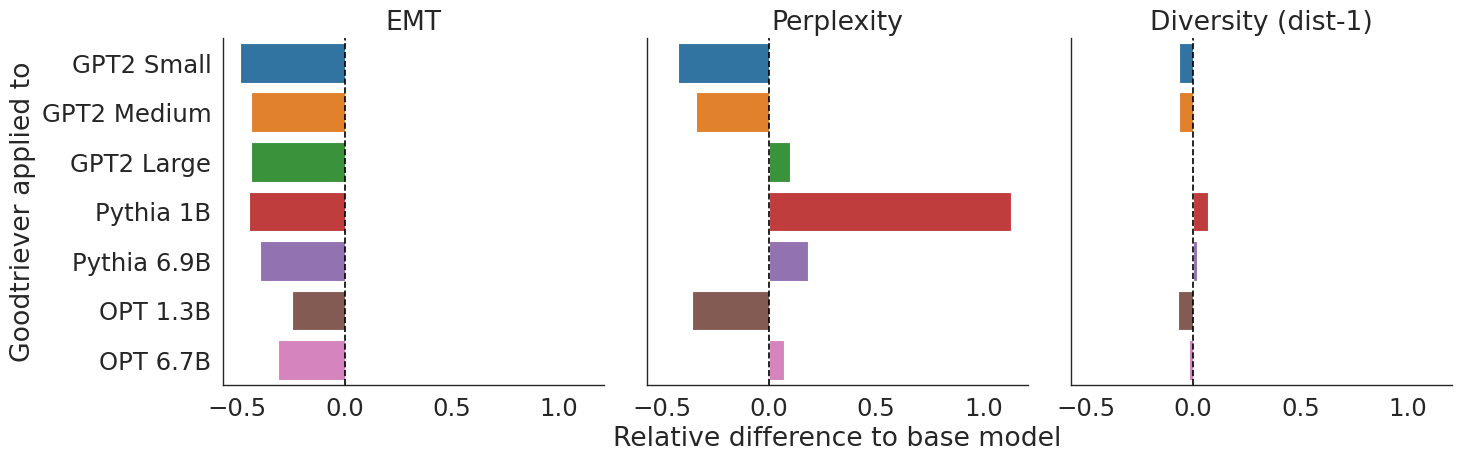

In [13]:
temp = edited.query("model != base").melt(id_vars=["model", "base"], value_vars=metrics)

sns.set(context="paper", style="white", font_scale=2, palette="RdBu")
g = sns.catplot(
    data=temp,
    y="base",
    x="value",
    col="variable",
    kind="bar",
    sharex=True,
    palette="tab10"
)

g.set_titles("{col_name}")
for i, ax in enumerate(g.axes.flat):
    ax.axvline(x=0, ymax=1, color="black", linestyle="--")
    if i == 0:
        ax.set_ylabel("Goodtriever applied to")
    if i == 1:
        ax.set_xlabel("Relative difference to base model")
    else:
        ax.set_xlabel("")

plt.savefig("images/model_families_relative.pdf", format="pdf", bbox_inches="tight")

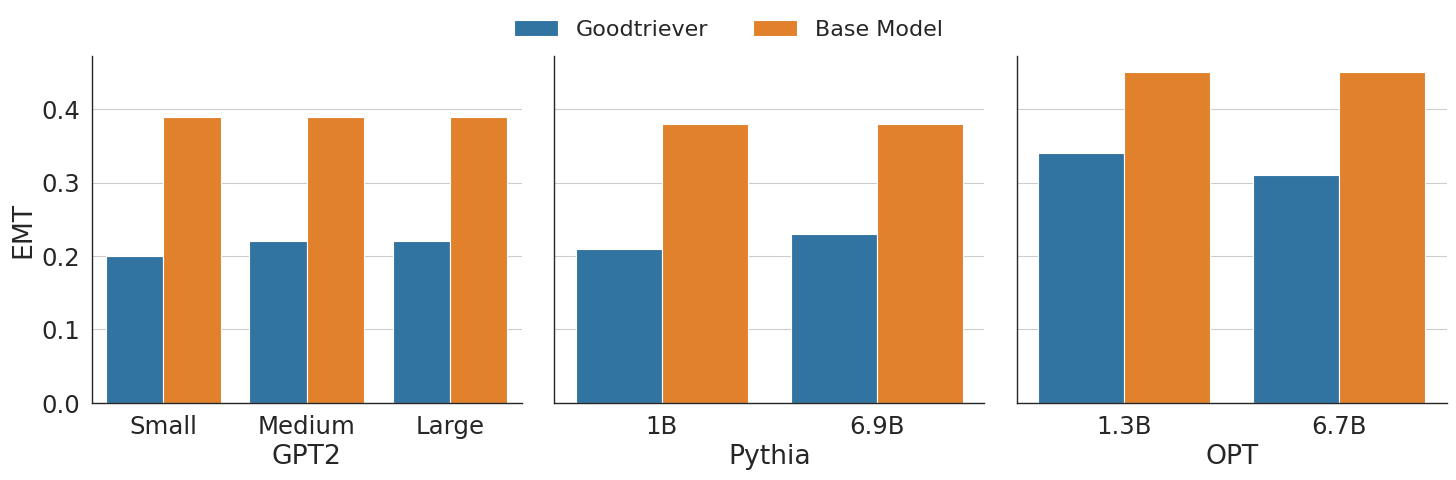

In [14]:
temp = results.melt(id_vars=["model", "base", "family"], value_vars=metrics)
temp.loc[temp.query("base == model").index, "Model Type"] = "Base Model"
temp.loc[temp.query("base != model").index, "Model Type"] = "Goodtriever"

sns.set(context="paper", style="white", font_scale=2, palette="RdBu")
temp = temp.query("variable == 'EMT'")

g = sns.catplot(
    data=temp,
    x="base",
    y="value",
    hue="Model Type",
    col="family",
    kind="bar",
    sharex=False,
    sharey=True,
    palette="tab10",
)
g.set_titles("")
plt.ylabel(metrics[0])
for i, ax in enumerate(g.axes.flat):
    if i == 0:
        ax.set_ylabel(metrics[0])

    labels = ax.get_xticklabels()
    family = [l.get_text().split(" ")[0] for l in labels]
    new_labels = [l.get_text().split(" ")[-1] for l in labels]
    ax.set_xticklabels(new_labels)
    ax.set_xlabel(family[0])
    ax.grid(axis='y')

sns.move_legend(g, "upper center", ncols=2, fontsize=16, title="")

plt.savefig("images/model_families_absolute.pdf", format="pdf", bbox_inches="tight")